In [1]:

#salary_Data 

In [5]:
# Step 1: Import the required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Step 2: Load and explore the dataset
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')
train_data.head()


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
train_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [7]:
test_data.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [8]:
train_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [9]:
test_data.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<Axes: xlabel='Salary', ylabel='Count'>

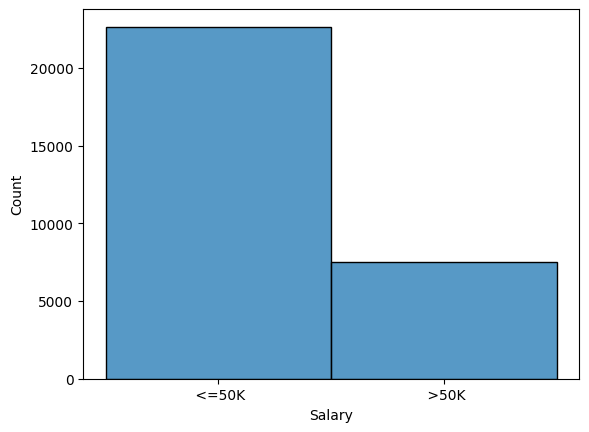

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# create a histogram of the salary data
sns.histplot(data=train_data, x='Salary')


#As in the above observation Salary <=50k has more weightage and >50k is less. That means Top managements have salary above 50k while the associates who are freshers or some years of experienced have less than equal to50k salary. 


<Axes: xlabel='hoursperweek', ylabel='Salary'>

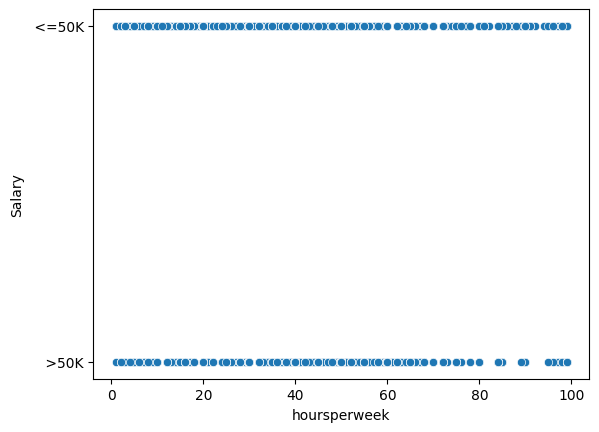

In [11]:
# create a scatter plot of years of experience and salary
sns.scatterplot(data=train_data, x='hoursperweek', y='Salary')


#More number of hours worked has more salary. According to the years of experience, job responsibilities are also more. Hence salary paid is also more. 

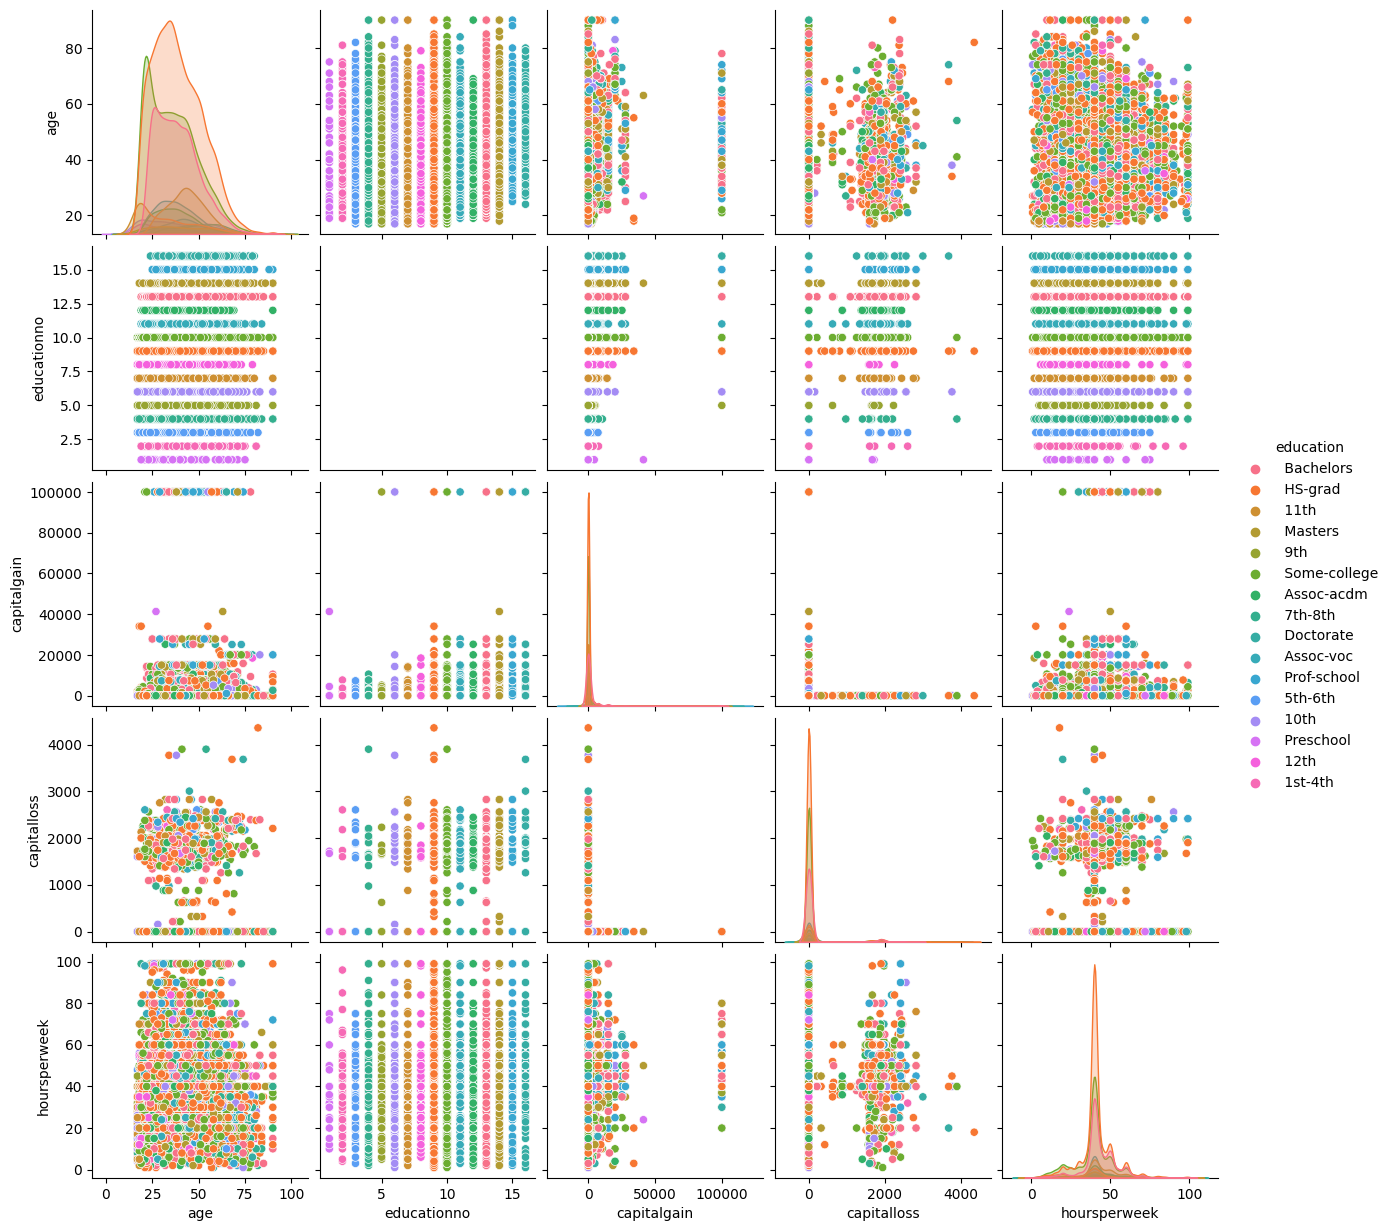

In [12]:
# create a pairplot to visualize relationships between all variables
sns.pairplot(data=train_data, hue='education')

In [13]:
# Step 3: Data preprocessing
# Encode the categorical variables using one-hot encoding
X_train = pd.get_dummies(train_data.drop('Salary', axis=1))
y_train = train_data['Salary']
X_test = pd.get_dummies(test_data.drop('Salary', axis=1))
y_test = test_data['Salary']

In [14]:
# Align the training and test data to make sure they have the same columns
X_train, X_test = X_train.align(X_test, join='outer', axis=1, fill_value=0)

In [15]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Split the data into training and testing sets
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)


In [16]:

# # Step 5: Train the SVM model
# svm = SVC(kernel='linear', C=1.0, random_state=42)
# svm.fit(X_train_final, y_train_final)

# # Step 6: Evaluate the model on the test set
# accuracy = svm.score(X_val, y_val)
# print("Accuracy on validation set: {:.2f}%".format(accuracy*100))


In [22]:
# Step 5: Train the SVM model
svm = SVC()
svm.fit(X_train_final, y_train_final)

# Step 6: Evaluate the model on the test set
accuracy = svm.score(X_val, y_val)
print("Accuracy on validation set: {:.2f}%".format(accuracy*100))


#Also Caluclated on basis of hyperparameters by using GridSearchCV [svm = SVC(kernel='linear', C=1.0, random_state=42)].It gives
#output as 84.62% but it takes a lot time to run and hence also tried with Randomized Search CV Class but the time taken
#there also has a similar constraint

Accuracy on validation set: 84.37%


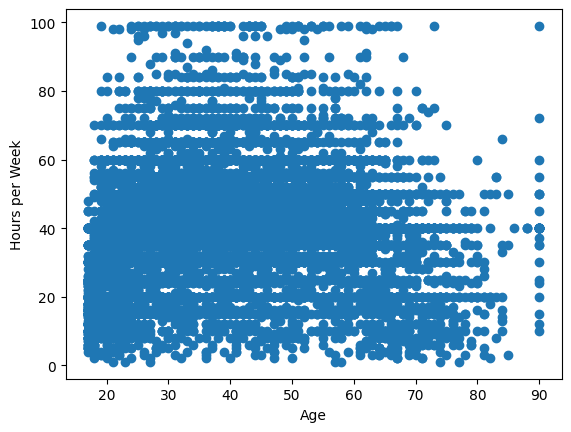

In [18]:
import matplotlib.pyplot as plt
plt.scatter(train_data['age'], train_data['hoursperweek'])
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

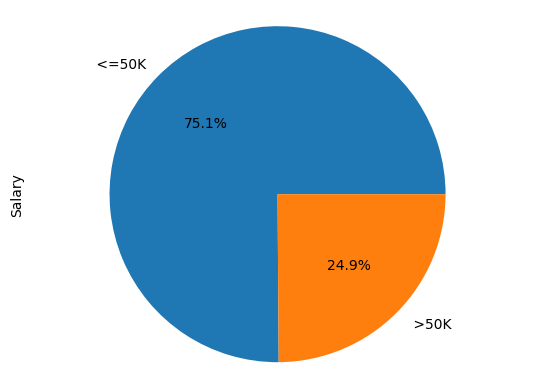

In [19]:


train_data['Salary'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.show()

In [20]:
# Make predictions on test set
y_pred = svm.predict(X_test)

# Print classification report and confusion matrix
print('Classification report:\n', classification_report(y_test, y_pred))
print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))

Classification report:
               precision    recall  f1-score   support

       <=50K       0.75      1.00      0.86     11360
        >50K       0.00      0.00      0.00      3700

    accuracy                           0.75     15060
   macro avg       0.38      0.50      0.43     15060
weighted avg       0.57      0.75      0.65     15060

Confusion matrix:
 [[11360     0]
 [ 3700     0]]


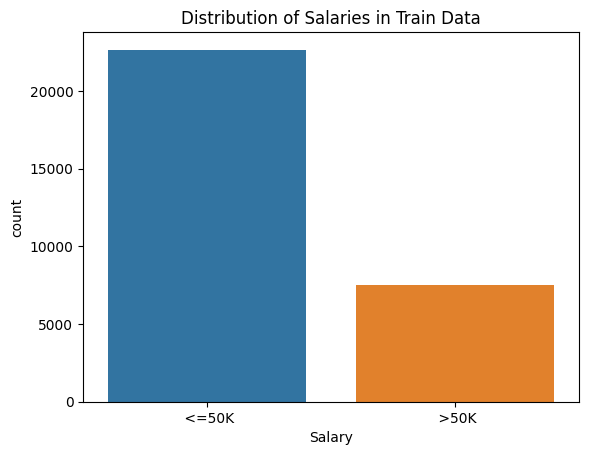

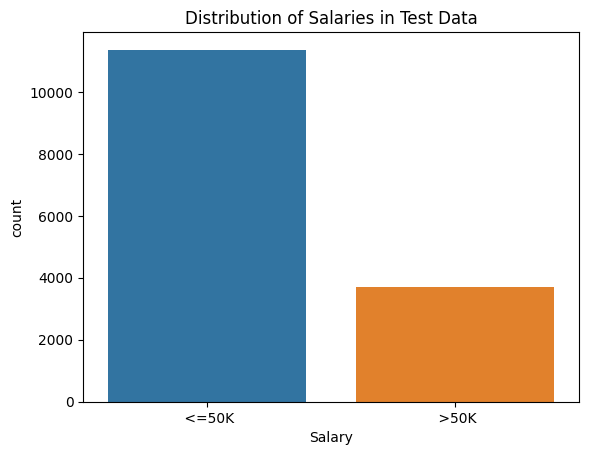

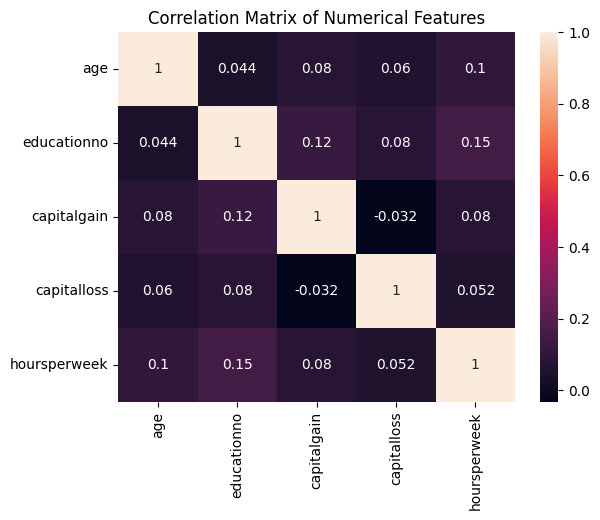

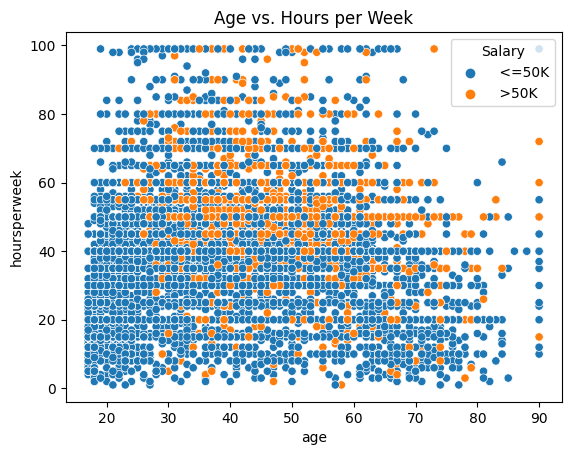

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

# Distribution of salaries in the train data
sns.countplot(x='Salary', data=train_data)
plt.title('Distribution of Salaries in Train Data')
plt.show()

# Distribution of salaries in the test data
sns.countplot(x='Salary', data=test_data)
plt.title('Distribution of Salaries in Test Data')
plt.show()

# Correlation matrix of numerical features
corr = X_train.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Scatter plot of age vs. hours per week
sns.scatterplot(x='age', y='hoursperweek', hue='Salary', data=train_data)
plt.title('Age vs. Hours per Week')
plt.show()